In [4]:
!pip install --upgrade moviepy
!pip install torch torchvision torchaudio

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [42]:
new_directory = '/content/drive/MyDrive/class1/video-classification-3d-cnn-pytorch'
os.chdir(new_directory)

updated_directory = os.getcwd()
print("更新后的工作目录:", updated_directory)

更新后的工作目录: /content/drive/MyDrive/class1/video-classification-3d-cnn-pytorch


In [64]:
def loadVideosToInfile1(folder):
    videos = os.listdir(folder)
    with open('output1', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile1('../input_films')

In [65]:
def loadVideosToInfile2(folder):
    videos = os.listdir(folder)
    with open('output2', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile2('../input_films2')

In [61]:
!python main.py --input output1 --video_root ../input_films --output ../output_features1.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda


Streaming output truncated to the last 5000 lines.
          [ 72.2252,  72.2252,  76.2252,  ..., -34.7748, -47.7748, -41.7748],
          [ 76.2252,  76.2252,  78.2252,  ..., -55.7748, -46.7748, -36.7748],
          ...,
          [ 87.2252,  88.2252,  87.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 86.2252,  87.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 82.2252,  87.2252,  91.2252,  ...,  45.2252,  45.2252,  45.2252]],

         [[ 68.2252,  69.2252,  73.2252,  ..., -31.7748, -54.7748, -55.7748],
          [ 72.2252,  72.2252,  76.2252,  ..., -34.7748, -47.7748, -41.7748],
          [ 76.2252,  76.2252,  78.2252,  ..., -55.7748, -46.7748, -36.7748],
          ...,
          [ 87.2252,  88.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 86.2252,  88.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 82.2252,  87.2252,  91.2252,  ...,  45.2252,  45.2252,  45.2252]],

         [[ 68.2252,  69.2252,  73.2252,  ..., -32.7748, 

In [66]:
!python main.py --input output2 --video_root ../input_films2 --output ../output_features2.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda


Streaming output truncated to the last 5000 lines.
          [ 72.2252,  72.2252,  76.2252,  ..., -34.7748, -47.7748, -41.7748],
          [ 76.2252,  76.2252,  78.2252,  ..., -55.7748, -46.7748, -36.7748],
          ...,
          [ 87.2252,  88.2252,  87.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 86.2252,  87.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 82.2252,  87.2252,  91.2252,  ...,  45.2252,  45.2252,  45.2252]],

         [[ 68.2252,  69.2252,  73.2252,  ..., -31.7748, -54.7748, -55.7748],
          [ 72.2252,  72.2252,  76.2252,  ..., -34.7748, -47.7748, -41.7748],
          [ 76.2252,  76.2252,  78.2252,  ..., -55.7748, -46.7748, -36.7748],
          ...,
          [ 87.2252,  88.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 86.2252,  88.2252,  88.2252,  ...,  46.2252,  46.2252,  46.2252],
          [ 82.2252,  87.2252,  91.2252,  ...,  45.2252,  45.2252,  45.2252]],

         [[ 68.2252,  69.2252,  73.2252,  ..., -32.7748, 

In [67]:
file = open('../output_features2.json')
segments = json.load(file)
len(segments)

13

In [68]:
for s in segments: print(s['video'])

video2.mp4
video3.mp4
video4.mp4
video5.mp4
video6.mp4
video7.mp4
video14.mp4
video11.mp4
video8.mp4
video12.mp4
video13.mp4
video10.mp4
video9.mp4


In [69]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [70]:
import numpy as np
import json

In [71]:
file1 = open('../output_features1.json')
segments1 = json.load(file1)
file2 = open('../output_features2.json')
segments2 = json.load(file2)

film1Features = []
for s in segments1[0]['clips']:
    film1Features.append(np.array(s['features']))

In [72]:
def find_best_range(films, sample_film_features):
    best_range_info = {
        'start': 0,
        'score': 100000000,
        'filmX_index': -1
    }

    for filmX_index, filmX in enumerate(films):
        filmX_features = []
        for s in filmX['clips']:
            filmX_features.append(np.array(s['features']))

        for i in range(len(filmX_features) - len(sample_film_features)):
            distance = 0
            for j in range(len(sample_film_features)):
                d = np.linalg.norm(filmX_features[i + j] - sample_film_features[j])
                distance += d

            if distance < best_range_info['score']:
                best_range_info['start'] = i
                best_range_info['score'] = distance
                best_range_info['filmX_index'] = filmX_index

    return best_range_info

best_range_info = find_best_range(segments2, film1Features)
print(f"Best Range Start: {best_range_info['start']}")
print(f"Best Range Score: {best_range_info['score']}")
print(f"Best Range belongs to Film Index: {best_range_info['filmX_index']}")

Best Range Start: 3
Best Range Score: 731.6787717212065
Best Range belongs to Film Index: 5


In [86]:
from IPython.display import Video
from moviepy.editor import VideoFileClip

def exportXVideo(XVideo, Samfeatures, best_range_info):
    tsfps = XVideo.fps
    tsFrameLength = 1 / tsfps
    nrFrames = len(Samfeatures) * 16
    startFrame = best_range_info['start'] * 16

    startTime = max(0, startFrame * tsFrameLength)
    endTime = min(XVideo.duration, startTime + nrFrames * tsFrameLength)
    try:
        X_Matched_sample_Video = XVideo.subclip(startTime, endTime)
        X_Matched_sample_Video.ipython_display()
        X_Matched_sample_Video.close()  # 显式关闭显示
        X_Matched_sample_Video.write_videofile("../output_films/output_video.mp4", audio_codec='aac', codec='libx264')
    except Exception as e:
        print(f"Fail: {e}")
    return X_Matched_sample_Video

XVideo = VideoFileClip("../input_films2/video14.mp4")
Samfeatures = film1Features
best_range_info = best_range_info
X_Matched_sample_Video = exportXVideo(XVideo, Samfeatures, best_range_info)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
Moviepy - Building video ../output_films/output_video.mp4.
Moviepy - Writing video ../output_films/output_video.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/output_video.mp4


In [87]:
X_Matched_sample_Video.duration

9.027999999999999

In [88]:
frame = X_Matched_sample_Video.get_frame(1)

In [89]:
from PIL import Image

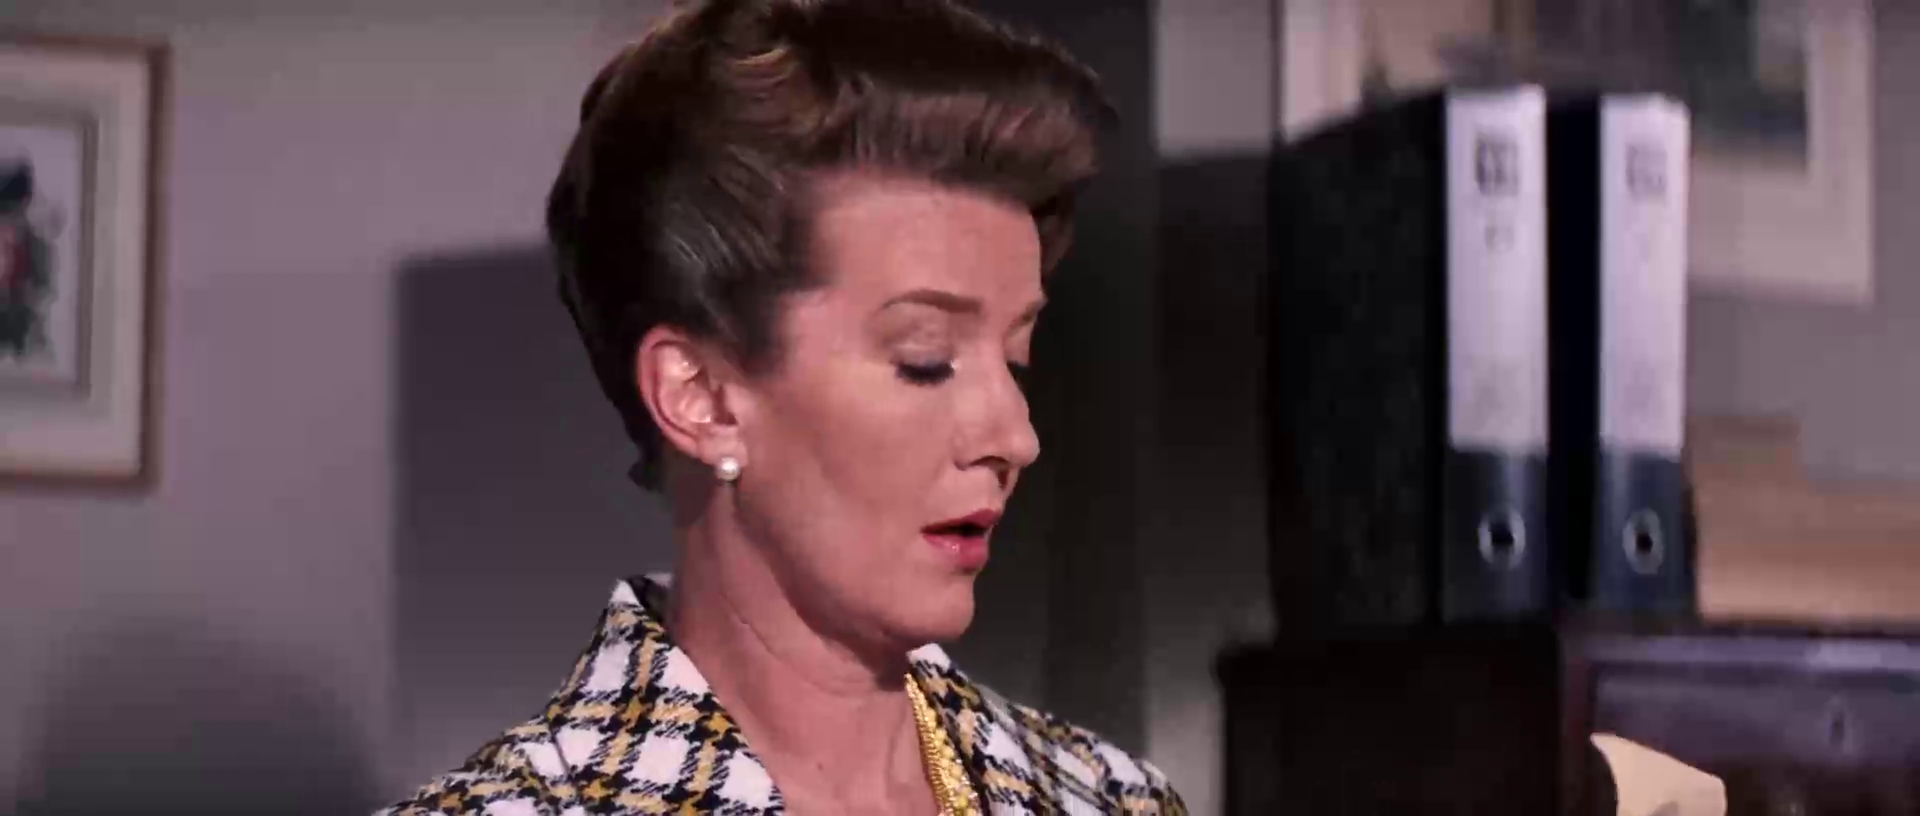

In [90]:
Image.fromarray(frame,'RGB')